<div style="text-align: center;">
<FONT size="8">
<BR><BR><b>
Stochastic Processes: <BR><BR>Data Analysis and Computer Simulation  
</b>
</FONT>
<BR><BR><BR>

<FONT size="7">
<b>
Stochastic processes in the real world
</b>
</FONT> 
<BR><BR><BR>

<FONT size="7">
<b>
-A Stochastic Dealer Model-
</b>
</FONT>
<BR>
</div>

#### Note 1

- In the present lesson, we will introduce a simple stochastic model that can reproduce many of the phenomonological properties observed in real-world financial markets
- The model can be easily understood as a generalized random walk.

In [2]:
%matplotlib inline
import numpy as np  # import numpy library as np
import math         # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot') # use "ggplot" style for graphs
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)

#### Note 2
- As usual, we begin by importing the necessary numerical and graphics libraries.

In [3]:
# Logarithmic return of price time series
def logreturn(St,tau=1):
    return np.log(St[tau:]) - np.log(St[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
# normalize data to have unit variance (<(x - <x>)^2> = 1)
def normalized(data):
    return ((data)/np.sqrt(np.var(data)))
# compute normalized probability distribution function
def pdf(data,bins=50):
    hist, edges = np.histogram(data[~np.isnan(data)], bins=bins, density=True) # remove NaNs and compute histogram
    edges   = (edges[:-1] + edges[1:])/2.0 # get bar center
    nonzero = hist > 0.0                   # non-zero points 
    return edges[nonzero], hist[nonzero]

#### Note 3
- We define the helper functions introduced in the previous lesson to analyze the stock returns.

## The Dealer Model
![](fig/dealers0.png)

- K. Yamada, H. Takayasu, T. Ito and M. Takayasu, <i>Physical Revew E</i> <b>79</b>, 051120 (2009).

- Simple Stochastic model with only two dealers offering buying and selling options.

- The buy or bid price is the maximum price that the dealer is willing to pay.

- The sell or ask price is the minimum price that the dealer is willing to accept.

- The difference between the ask and bid prices is called the spread $L$ and we assume it is a constant.

- The mid-price $p_i(t)$ of dealer $i$ at time $t$ is the average of his bid and ask price.

- A transaction takes place whenever the difference between the mid-prices of two dealers is larger than $L$
$$
	\lvert p_i(t) - p_j(t) \rvert \ge L\tag{K1} : \textrm{Transaction Criterion}	
$$

#### Note 4
- Here we will work with a simple stochastic model developed by Japanese researchers and published recently in Physical Review E, one of the main journals for statistical mechanics.
- Any stock market can be understood as a collection of agents or dealers buying and selling some stock.
- As a minimal model we consider a market with only two dealers, which we call 1 and 2, that are trading some stock.
- Each dealer has a maximum price that he is willing to pay to buy new stock, and a minimum price he is willing to accept to sell stock he already owns.
- We refer to these as the bid and ask prices, respectively.
- Since the dealers are in this to make money, the ask price should always be greater than the bid price.
- To characterize the position of the dealers, we introduce an additional price, called the mid-price, which is just the average of the bid and ask prices.
- For simplicity, we will assume that the difference between ask and bid prices, which is called the 'spread', is a constant equal for all dealers.
- Thus all we need to know the configuration of the market are the mid-prices $p_1$ and $p_2$ at each moment in time.
- We have not yet specified the dynamics of the dealer's prices, but we know that whenever the 'ask' price of one dealer is equal or lower than the 'bid' price of the other, they should perform a transaction.
- In mathematical terms, this is expressed as Eq.(K1). If the absolute value the difference is mid-prices is equal or larger to $L$, then a transaction will take place.
- In this model, we consider only one type of stock, and we do not attempt to model the amount of stock available. 
- Whenever a transaction takes place, we assume that a unit of stock is transferred from one dealer to the next, although the amount possessed by each of them is infinite.
- What we are interested here is not in the amount of stock that can change hands, but the price at which they are trading it.

## Dynamics of the dealer model
![](fig/dealers.png)
- Prices evolve independently, carrying out a 1D random walk in 'price' space until a transaction takes place.
$$
p_i(t + \Delta t) = p_i(t) + c f_i(t), \qquad \qquad i=1,2\tag{K2}\\
$$

$$
f_i(t) = \begin{cases}
    +\Delta p & \mathrm{probability} 1/2 \\
    -\Delta p & \mathrm{probability} 1/2
\end{cases}
$$

- When Eq.(K1) is satisfied, a transaction takes place and we update the "Market" price $P$ to be the average of the two mid-prices 
$$P = (p_1 + p_2)/2\tag{K3}$$

- At the following step, the prices of both dealers are reset to this new market price and a new random-walk begins for each of them.

- It is convenient to define a "Tick" time, which increases by one unit every time a transaction is made.

#### Note 5
- Let us now discuss the dynamics of this dealer model.
- The mid-price is assumed to follow a 1D random-walk in 'price' space.
- Previously, you learned that a random walk can describe the thermal motion of colloidal particles in a fluid. At each step, the colloid experiences some random forces due to the surrounding water molecules.
- In this case, we can consider the random step to be caused by the influence of the outside world on the dealer. Everything he sees and learns can change his opinion of how much he thinks that the stock is worth.
- The update rule for the prices is given in Eq. (K2), which you will recognize as a simple 1D random walk process. At each step the stock can move up or down by a fixed amount with equal probabilities.
- While the dealers' prices are evolving independently, the moment that the transaction condition (Eq. (K1)) is satisfied they will execute a trade and exchange one unit of stock.
- The price of the trade, which by definition will be the Market price $P$ of the stock, is given by the average of the mid-prices.
- After the exchange, the dealers are free to resume their respective random walks, but now they starting price is the Market price of the transaction that just took place.
- Finally, it is convenient to define an additional unit of time, called the 'tick' time. The tick time measures the number of transactions. Every time a transaction takes place, we update the tick time by one.
- In contrast the 'real' time measures the total number of steps taken during the random walk.
- In the figure, we have drawn a schematic representation of the dynamics given by the model.
- At time $t_i$, the bid price of dealer 1 matches the ask price of dealer 2. A transaction takes place, in which dealer 1 buys one unit of stock from dealer 2, at a market price $P_n$.
- At this point, we set the 'tick' time to be $n$.
- After the transaction, the two dealers are in agreement regarding the price of the stock. Thus, their mid-price matches the Market price $P_n$.
- The dealers resume their independent random walks until time $t_{i+3}$, when dealer 2 buys from dealer 1 at a Market price of $P_{n+1}$.

## Dealer model as a 2D random walk
- The dealer model can be understood as a standard 2D Random walk with absorbing boundaries.

- Perform a change in variables, from $p_1(t)$ and $p_2(t)$, to the price difference $D(t)$ and average $A(t)$

$$
D(t) = p_1(t) - p_2(t) \tag{K4}
$$
$$
A(t) = \frac{1}{2}\big(p_1(t) + p_2(t)\big)\tag{K5}
$$

- Dynamics of $D$ and $A$ describe a 2D random walk

$$
D(t+\Delta t) = D(t) + \begin{cases}
+2 c \Delta p & \textrm{probability 1/4} \\
0 & \textrm{probability 1/2} \\
-2 c\Delta p& \textrm{probability 1/4}
\end{cases} \tag{K6} \\
$$

$$
A(t+\Delta t) = A(t) + \begin{cases}
+c\Delta p & \textrm{probability 1/4}\\
0 & \textrm{probability 1/2}\\
-c\Delta p &\textrm{probability 1/4}
\end{cases}\tag{K7}
$$

- When $D(t) = \pm L$ a transaction occurs and the random walk ends, the "particle" is absorbed by the boundary.

#### Note 6
- To make the link to a random walk process even more evident.
- Let us make a change in variables, from the mid-prices $p_1$ and $p_2$, to the price difference D and A, as defined in Eqs.(K4-K5).
- The two 1D random walks can then be transformed into a single 2D random walk in this (A,D) space, with the dynamics defined in Eq.(K6-K7).
- In this 2D space, the "particle" can move along the A axis left or right a distance c Delta p, with probability 1/4, or it can move along the D axis up or down a distance 2 c Delta p, with probability 1/4. It cannot stay in the same position.
- In contrast to the examples you saw previously, this random walk is constrained by the transaction condition.
- Whenever the price difference is greater than L, the random walk ends, and a transaction takes place.
- This means that we have two absorbing boundaries at the top and bottom of our domain, for D equals plus or minus L. When the "particle" gets to this point the random walk has to end.
- We will try to visualize this with a simple simulation next.

In [4]:
params = {'L' : 0.01, 'c': 0.01, 'dp' : 0.01, 'dt' : 0.01**2} # define model parameters
def model1RW(params,p0):                # simulate Random-Walk for 1 transaction
    price = np.array([p0[0], p0[1]])    # initialize mid-prices for dealers p_1 and p_2
    cdp   = params['c']*params['dp']    # define random step size
    Dt    = [price[0]-price[1]]         # initialize price difference as empty list
    At    = [np.average(price)]         # initialize avg price as empy list
    while np.abs(price[0]-price[1]) < params['L']:
        price = price + np.random.choice([-cdp,cdp], size=2)      # random walk step for mid-prices Eq. (K2)
        Dt.append(price[0]-price[1])
        At.append(np.average(price))
    return np.array(Dt), np.array(At) - At[0]   # return difference array and average centered at zero

#### Note 7
- To begin we define a dictionary which groups all the simulation parameters, the spread L, the constants c and dp that determine the random step size, and the time step dt.
- Then we define a function which performs the random walk for a single transaction.
- That is, given an initial mid-price for dealers one and two, it will solve for the two independent random walks defined in Eq.(K2).
- The random walks end the moment that the price difference exceeds the spread L.
- To aid in the visualization, we save the trajectory data not for the prices, but for the difference and average, defined in Eq.(K4-K5), which should describe a 2D random walk.

Walk  0  : number of steps =  9248 , price change =  -0.00270000000009
Walk  1  : number of steps =  2201 , price change =  0.00340000000011
Walk  2  : number of steps =  1629 , price change =  0.00280000000009


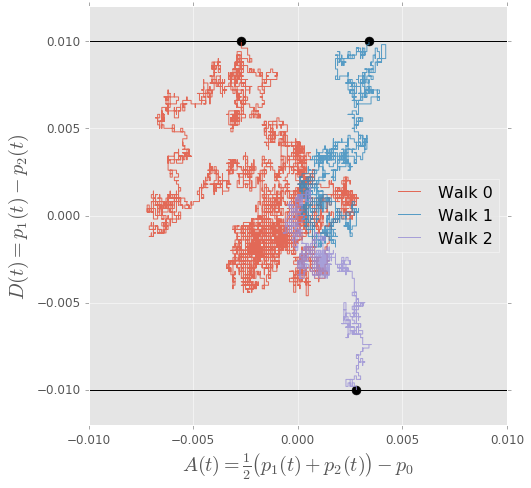

In [5]:
np.random.seed(123456)
fig, ax = plt.subplots(figsize=(7.5,7.5), subplot_kw={'xlabel':r'$A(t) = \frac{1}{2}\left(p_1(t) + p_2(t)\right) - p_0$', 'ylabel':r'$D(t) = p_1(t) - p_2(t)$'})
p0 = [100.25, 100.25]
for i in range(3):
    Dt,At = model1RW(params, p0)
    ax.plot(At, Dt, alpha=0.8, label='Walk '+str(i)) #plot random walk trajectory
    ax.scatter(At[-1],Dt[-1], marker='o', s=80, color='k')  #last point
    print('Walk ', i, ' : number of steps = ', len(At), ', price change = ', At[-1])
ax.plot([-0.01,0.03], [params['L'], params['L']], color='k')   #top absorbing boundary P=L
ax.plot([-0.01,0.03], [-params['L'], -params['L']], color='k')  #bottom absorbing boundary P=-L
ax.set_ylim([-0.012, 0.012])
ax.set_xlim([-0.01, 0.01])
ax.legend(loc=5,framealpha=0.8)
plt.show()

#### Note 8
- Here we perform three independent simulations of one transaction each, starting from the same initial configuration (same prices).
- As you can see from the plots of the trajectory data, the particle is undergoing a random walk, with random displacements up/down/left/right.
- However, we can easily see that the vertical steps are longer than the horizontal steps, just as predicted from Eq.(K6-K7)
- We have drawn the absorbing boundaries for $D=\pm L$. When the particle reaches any of these lines, the difference in the mid-prices is larger than the spread and a transaction occurs.
- This signals the end of the random-walk and the start of a transaction.
- The horizontal position at which the particles touch the boundary gives the change in the market price of the stock, and determine the new market-price.
- In the three examples shown here, Walk 0 and Walk 1 end at the top boundary, which means dealer 1 bus from dealer 2; Walk 2 ends with dealer 1 selling to dealer 2.
- Also, for Walk 0, the Market price at the end of the walk is lower than at the start, whereas for Walks 1 and 2 it is higher.
- Finally, we notice that the number of steps required for the particle to reach the boundary can be vary large. Here, we needed almost 10000 steps for Walk 1 to finish, compared with just 1600 for Walk 2.

In [6]:
params = {'L' : 0.01, 'c': 0.01, 'dp' : 0.01, 'dt' : 0.01**2} # define model parameters
def model1(params,p0,numt):                # simulate dealer model for numt ticks
    mktprice = np.zeros(numt)              # initialize array for market prices
    ticktime = np.zeros(numt,dtype=np.int) # initialize array for tick times
    price    = np.array([p0[0], p0[1]])    # initailize dealer's mid-price (p1,p2)
    time,tick = 0,0                        # real time (t) and tick time (n)
    cdp      = params['c']*params['dp']    # define random step size
    while tick < numt:                     # loop over ticks
        while np.abs(price[0]-price[1]) < params['L']: # perform one RW for each transaction
            price = price + np.random.choice([-cdp,cdp], size=2)  # random walk step Eq. (K2)
            time += 1 # update time t
        price[:] = np.average(price)       # set mid-prices to new market price Eq. (K3)
        mktprice[tick] = price[0]          # save market price
        ticktime[tick] = time              # save tick time
        tick += 1                          # updat ticks
    return ticktime,mktprice   

In [ ]:
np.random.seed(0)
ticktime,mktprice = model1(params, [100.25, 100.25], 5000)
np.savetxt('model1.txt',np.transpose([ticktime, mktprice]))

#### Note 9
- We want to run a simulation of our model stock market over many transactions.
- For this, we modify the previous code to repeatedly perform many random walks, updating the market price, and resetting the mid-prices of the dealers after each one.
- We only require one additional parameter numt, which is the number of ticks, or number of random walks to perform.
- We define arrays of size numt for the market price and the tick time. The former for the market price of the transactions, the latter for the time at which the transactions took place.
- The main code can be written as two nested while loops, one for the number of transactions, the other for random-walk of a single transaction.
- At the end of a random walk, we perform a transaction by setting the new market price to be the average of the mid-prices and we also save the current time.
- Because the simulation takes around 4 minutes, we will not evaluate it now. We have previously saved the data to a file and will use this to analyze the trajectories.

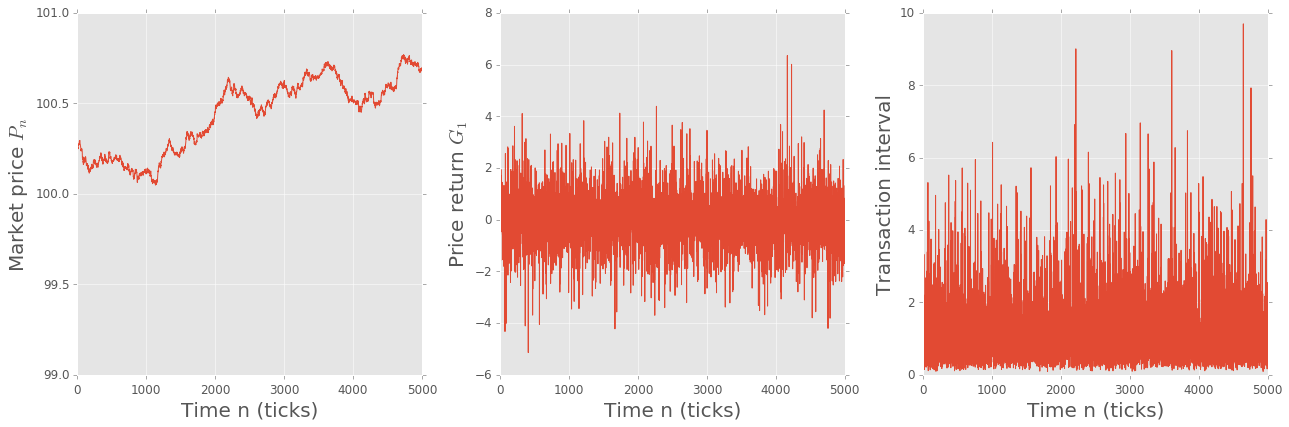

In [7]:
ticktime,mktprice = np.loadtxt('model1.txt', unpack=True)     # read saved data from file
timeinterval   = normalized((ticktime[1:] - ticktime[0:-1])*params['dt']) # compute time difference between subsequent trades
dprice         = normalized(logreturn(mktprice, 1))                       # compute logarithmic return of the price over one tick, normalized to have unit variance (Eq. J2)
fig,[ax,bx,cx] = plt.subplots(figsize=(18,6), ncols=3, subplot_kw={'xlabel':r'Time n (ticks)'})
ax.plot(mktprice)
ax.set_ylim(99,101)
ax.set_ylabel(r'Market price $P_n$')
bx.plot(dprice)
bx.set_ylabel(r'Price return $G_1$')
cx.plot(timeinterval)
cx.set_ylabel(r'Transaction interval')
fig.tight_layout() # get nice spacing between plots
plt.show()

#### Note 10
- We start by loading our previously saved simulation data.
- This data contains the time stamp for each transaction, together with the stock price.
- The time values are not interesting in themselves, what is more interesting is the time intervals between subsequent trades, which we save in an array 'dprice'.
- Likewise, the stock price in itself does not tell us so much. Instead we look at the logarithmic difference of the price between two trades $G_1(t)$.
- This return can be easily computed using the functions defined in the previous lesson. For convenience we also normalize the data to have unit variance.
- The three data sets, the stock price, the price return, and the transaction interval are plotted here.
- Looking at the stock price, we see quantity that is fluctuating in time in a manner reminiscent of real stocks. We see small scale fluctuations together with large scale price changes.
- For the price return, we see evidence of a stochastic process that is clearly non-Gaussian in nature, as we obtain values which are more than 6 standard deviations away from the mean.

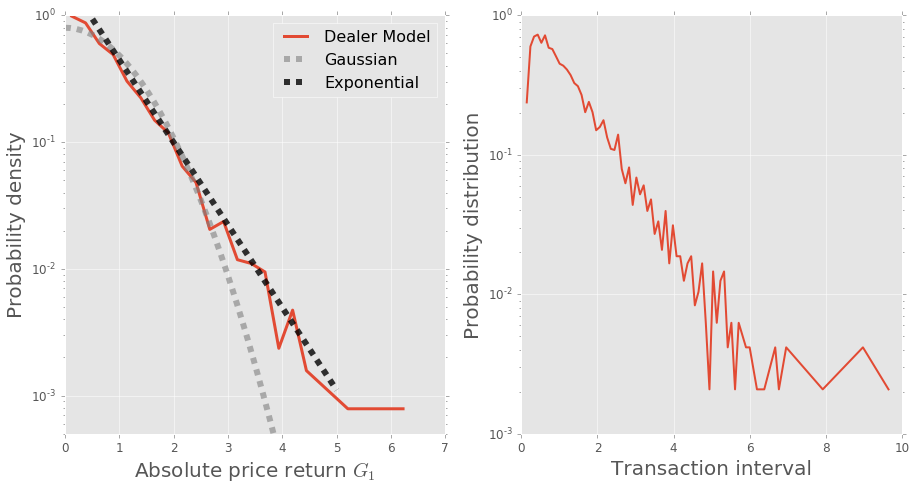

In [53]:
fig, [ax,bx] = plt.subplots(figsize=(15,7.5), ncols=2, subplot_kw={'ylabel':r'Probability distribution'})
edges,hist = pdf(np.abs(dprice),bins=25) # probability density of price change G_1 between ticks
ax.plot(edges, hist, lw=3, label='Dealer Model')
x = np.linspace(0, 5)
ax.plot(x, 2*np.exp(-x**2/2)/np.sqrt(2*np.pi), lw=6,ls='--',color='gray', alpha=0.6, label=r'Gaussian')
ax.plot(x, 2*np.exp(-1.5*x), lw=6, color='k',ls='--', alpha=0.8, label=r'Exponential')
ax.set_xlabel(r'Absolute price return $G_1$')
ax.set_ylabel(r'Probability density')
ax.set_ylim([5e-4,1])
ax.semilogy()
ax.legend()
edges,hist = pdf(timeinterval, bins=100) # probability density of transaction time intervals between ticks
bx.plot(edges,hist, lw=2)
bx.set_xlabel(r'Transaction interval')
bx.set_ylabel(r'Probability distribution')
bx.semilogy()
plt.show()

#### Note 11
- To evaluate the mode we need to perform a more quantitative analysis.
- For this, we calculate the probability distribution functions of the absolute price return and the transaction interval.
- We plot the data on a semi-logarithmic scale, and see that both distributions fall on a straight line (at leas for the tails).
- This means that the distribution is exponential, and thus defined by a Poisson process.
- [RY] How does this compare to real data? We saw that the price return is actually a power law, what about the transaction interval?
- As you say, the price return is not correctly described, and neither is the transaction interval.
- In real markets, the transactions show very clear long-scale patterns (corresponding to times when the markets open in Tokyo, London, and New York) and show clustered and sparse regions at short time scales.
- This is cannot be described by the simple Poisson process we have here.
- However, I think the fact that we have such a simple model, essentially two independent random walks, that can reproduce some non-trivial behavior similar to that of real markets is quite remarkable.
- In fact, we can easily improve the model to fix the short-comings you have pointed out.
- In the next lesson I will present one solution to recover the power-law behavior of the price returns you have mentioned.